In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import NumPy

In [74]:
data_path = r'C:\Users\fadia\OneDrive\Desktop\Ody\Scripts\Transformed Data\Master Combined\Master_Sales_Data_2021-08-19_to_2025-07-22.csv'
df=pd.read_csv(data_path)
df['Day_Date'] = pd.to_datetime(df['Day_Date'])

In [75]:
df

,Date,Item,Quantity,Price,Total_Price,Table,Payment,Day_Date,Weekday_Name,Table_Type,Period,Cost_Price
0,2021-08-19 14:00:51,Small Water,1,0.8,0.8,100,Credit,2021-08-19,Thu,Complementary,Lunch,0.058
1,2021-08-19 17:22:26,Small Water,1,0.8,0.8,100,Credit,2021-08-19,Thu,Complementary,Afternoon,0.058
2,2021-08-19 17:38:32,Small Water,1,0.8,0.8,2,Credit,2021-08-19,Thu,Dining Area,Afternoon,0.058
3,2021-08-19 17:51:23,Stella Draft,1,3.9,3.9,100,Credit,2021-08-19,Thu,Complementary,Afternoon,3.600
4,2021-08-19 18:59:01,Stella Draft,1,6.5,6.5,2,Credit,2021-08-19,Thu,Dining Area,Afternoon,3.600
...,...,...,...,...,...,...,...,...,...,...,...,...
745919,2025-07-22 23:48:46,Small Water,4,1.0,4.0,43,Capital-Visa,2025-07-22,Tue,Outdoor,Dinner,0.058
745920,2025-07-22 23:52:43,Small Water,1,1.0,1.0,5,Capital-Visa,2025-07-22,Tue,Dining Area,Dinner,0.058
745921,2025-07-22 23:53:07,Small Water,1,1.0,1.0,7,Capital-Visa,2025-07-22,Tue,Dining Area,Dinner,0.058
745922,2025-07-22 23:53:13,Small Water,3,1.0,3.0,7,Capital-Visa,2025-07-22,Tue,Dining Area,Dinner,0.058


In [76]:
#mask = (df["Item"] == "Ribeye Steak") & (df["Table"]!= 100) & (df["Table"]!= 200) & (df["Payment"]!= "Credit")
mask = (df["Item"] == "Small Water") & (df["Table"]!= 100) & (df["Table"]!= 200) & (df["Payment"]!= "Credit")

item_df = df[mask].copy()
item_df = item_df[['Date', 'Price']]

item_df['Date'] = pd.to_datetime(item_df['Date'])
item_df = item_df.sort_values('Date')
item_df['Sale_Date'] = item_df['Date'].dt.date # date without time , like 2023-01-01
item_df['Sale_Hour'] = item_df['Date'].dt.hour # hour of the day like 0 to 23

In [77]:
def assign_time_slot(hour):
    if 12 <= hour < 18: return 'Slot_12_to_18'
    elif 18 <= hour < 19: return 'Slot_18_to_19'
    elif 19 <= hour <= 23 or 0 <= hour < 2: return 'Base_Price_Hours'
    else: return 'Outside_Sale_Hours'
item_df['Time_Slot'] = item_df['Sale_Hour'].apply(assign_time_slot)
item_df[item_df['Time_Slot'] == 'Outside_Sale_Hours'] 

,Date,Price,Sale_Date,Sale_Hour,Time_Slot
59236,2022-01-01 02:01:44,1.0,2022-01-01,2,Outside_Sale_Hours
59238,2022-01-01 02:11:15,1.0,2022-01-01,2,Outside_Sale_Hours
59239,2022-01-01 02:11:15,1.0,2022-01-01,2,Outside_Sale_Hours
372421,2023-08-18 11:30:38,1.0,2023-08-18,11,Outside_Sale_Hours
372423,2023-08-18 11:45:37,1.0,2023-08-18,11,Outside_Sale_Hours


In [78]:
item_df

,Date,Price,Sale_Date,Sale_Hour,Time_Slot
16,2021-08-19 19:43:54,1.0,2021-08-19,19,Base_Price_Hours
49,2021-08-19 20:30:57,1.0,2021-08-19,20,Base_Price_Hours
50,2021-08-19 20:30:57,1.0,2021-08-19,20,Base_Price_Hours
95,2021-08-19 21:43:32,1.0,2021-08-19,21,Base_Price_Hours
98,2021-08-19 21:55:36,1.0,2021-08-19,21,Base_Price_Hours
...,...,...,...,...,...
745919,2025-07-22 23:48:46,1.0,2025-07-22,23,Base_Price_Hours
745920,2025-07-22 23:52:43,1.0,2025-07-22,23,Base_Price_Hours
745921,2025-07-22 23:53:07,1.0,2025-07-22,23,Base_Price_Hours
745922,2025-07-22 23:53:13,1.0,2025-07-22,23,Base_Price_Hours


In [79]:
mask = (item_df['Sale_Hour'] == 18) & (item_df["Time_Slot"] == "Slot_18_to_19") 
item_df[mask]

,Date,Price,Sale_Date,Sale_Hour,Time_Slot
1830,2021-08-29 18:40:34,1.0,2021-08-29,18,Slot_18_to_19
2616,2021-08-31 18:39:45,1.0,2021-08-31,18,Slot_18_to_19
2868,2021-09-01 18:28:26,1.0,2021-09-01,18,Slot_18_to_19
3533,2021-09-03 18:22:28,1.0,2021-09-03,18,Slot_18_to_19
4231,2021-09-05 18:14:59,1.0,2021-09-05,18,Slot_18_to_19
...,...,...,...,...,...
745356,2025-07-21 18:24:33,1.0,2025-07-21,18,Slot_18_to_19
745381,2025-07-21 18:58:19,1.0,2025-07-21,18,Slot_18_to_19
745720,2025-07-22 18:00:51,1.0,2025-07-22,18,Slot_18_to_19
745735,2025-07-22 18:33:04,1.0,2025-07-22,18,Slot_18_to_19


In [80]:

daily_prices = item_df.pivot_table(index='Sale_Date', columns='Time_Slot', values='Price', aggfunc=lambda x: x.mode()[0]).reset_index()
daily_prices["Slot_12_to_18"] = daily_prices["Slot_12_to_18"].fillna(0)
daily_prices["Slot_18_to_19"] = daily_prices["Slot_18_to_19"].fillna(0)
daily_prices.head(10)

Time_Slot,Sale_Date,Base_Price_Hours,Outside_Sale_Hours,Slot_12_to_18,Slot_18_to_19
0,2021-08-19,1.0,NaN,0.0,0.0
1,2021-08-23,1.0,NaN,1.0,0.0
2,2021-08-24,NaN,NaN,1.0,0.0
3,2021-08-25,1.0,NaN,0.0,0.0
4,2021-08-26,1.0,NaN,0.0,0.0
5,2021-08-27,1.0,NaN,0.0,0.0
6,2021-08-29,1.0,NaN,0.0,1.0
7,2021-08-30,1.0,NaN,0.0,0.0
8,2021-08-31,1.0,NaN,1.0,1.0
9,2021-09-01,1.0,NaN,1.0,1.0


In [81]:
daily_prices["Month"] = pd.to_datetime(daily_prices['Sale_Date']).dt.to_period('M')
daily_prices.head(10)

Time_Slot,Sale_Date,Base_Price_Hours,Outside_Sale_Hours,Slot_12_to_18,Slot_18_to_19,Month
0,2021-08-19,1.0,NaN,0.0,0.0,2021-08
1,2021-08-23,1.0,NaN,1.0,0.0,2021-08
2,2021-08-24,NaN,NaN,1.0,0.0,2021-08
3,2021-08-25,1.0,NaN,0.0,0.0,2021-08
4,2021-08-26,1.0,NaN,0.0,0.0,2021-08
5,2021-08-27,1.0,NaN,0.0,0.0,2021-08
6,2021-08-29,1.0,NaN,0.0,1.0,2021-08
7,2021-08-30,1.0,NaN,0.0,0.0,2021-08
8,2021-08-31,1.0,NaN,1.0,1.0,2021-08
9,2021-09-01,1.0,NaN,1.0,1.0,2021-09


In [82]:
# delet any row if have 0 in any of the columns
daily_prices_filtered = daily_prices[(daily_prices["Slot_12_to_18"] != 0) & (daily_prices["Slot_18_to_19"] != 0) & (daily_prices["Base_Price_Hours"] != 0)]

# i want new dataframe for most frequent value for each month for slot_12_to_18 , slot_18_to_19 and Base_Price_Hours

safe_mode = lambda x: x.mode()[0] if not x.mode().empty else np.nan

monthly_mode = daily_prices_filtered.groupby('Month').agg({
    'Slot_12_to_18': safe_mode,
    'Slot_18_to_19': safe_mode,
    'Base_Price_Hours': safe_mode
}).reset_index()

monthly_mode

Time_Slot,Month,Slot_12_to_18,Slot_18_to_19,Base_Price_Hours
0,2021-08,1.0,1.0,1.0
1,2021-09,1.0,1.0,1.0
2,2021-10,1.0,1.0,1.0
3,2021-11,1.0,1.0,1.0
4,2021-12,1.0,1.0,1.0
5,2022-01,1.0,1.0,1.0
6,2022-02,1.0,1.0,1.0
7,2022-03,1.0,1.0,1.0
8,2022-04,1.0,1.0,1.0
9,2022-05,1.0,1.0,1.0


In [83]:

# Use a lambda function to calculate the mode and handle empty groups
safe_mode = lambda x: x.mode()[0] if not x.mode().empty else np.nan

base_price_fill = monthly_mode.groupby([ "Slot_18_to_19"])["Base_Price_Hours"].agg(safe_mode).reset_index()
base_price_fill


,Slot_18_to_19,Base_Price_Hours
0,1.0,1.0


In [84]:
# i want to fill null value in monthly_mode["Base_Price_Hours"] 
# first look at data frame base_price_fill where Slot_18_to_19 equel monthly_mode["Slot_18_to_19"]
# then fill it with base_price_fill["Base_Price_Hours"]

# الخطوة 1: قم بإنشاء جدول البحث وتأكد من تحويل الفهرس إلى أعمدة
safe_mode = lambda x: x.mode()[0] if not x.mode().empty else np.nan
base_price_fill = monthly_mode.groupby(["Slot_18_to_19"])["Base_Price_Hours"].agg(safe_mode) .reset_index()
base_price_fill

,Slot_18_to_19,Base_Price_Hours
0,1.0,1.0


In [85]:
# الخطوة 2: قم بإنشاء "خريطة" للبحث. 
# الفهرس سيكون هو القيمة التي نبحث بها ('Slot_18_to_19')
# والقيم ستكون هي ما نريد أن نملأ به ('Base_Price_Hours')
lookup_map = base_price_fill.set_index('Slot_18_to_19')['Base_Price_Hours']
lookup_map

Slot_18_to_19
1.0    1.0
Name: Base_Price_Hours, dtype: float64

In [86]:
# الخطوة 3: استخدم الخريطة لملء القيم الفارغة في عمودك الأصلي
# .map(lookup_map) سيقوم بالبحث عن كل قيمة من 'Slot_18_to_19' في الخريطة وإرجاع القيمة المقابلة لها
monthly_mode['Base_Price_Hours'] = monthly_mode['Base_Price_Hours'].fillna(
    monthly_mode['Slot_18_to_19'].map(lookup_map)
)

monthly_mode

Time_Slot,Month,Slot_12_to_18,Slot_18_to_19,Base_Price_Hours
0,2021-08,1.0,1.0,1.0
1,2021-09,1.0,1.0,1.0
2,2021-10,1.0,1.0,1.0
3,2021-11,1.0,1.0,1.0
4,2021-12,1.0,1.0,1.0
5,2022-01,1.0,1.0,1.0
6,2022-02,1.0,1.0,1.0
7,2022-03,1.0,1.0,1.0
8,2022-04,1.0,1.0,1.0
9,2022-05,1.0,1.0,1.0


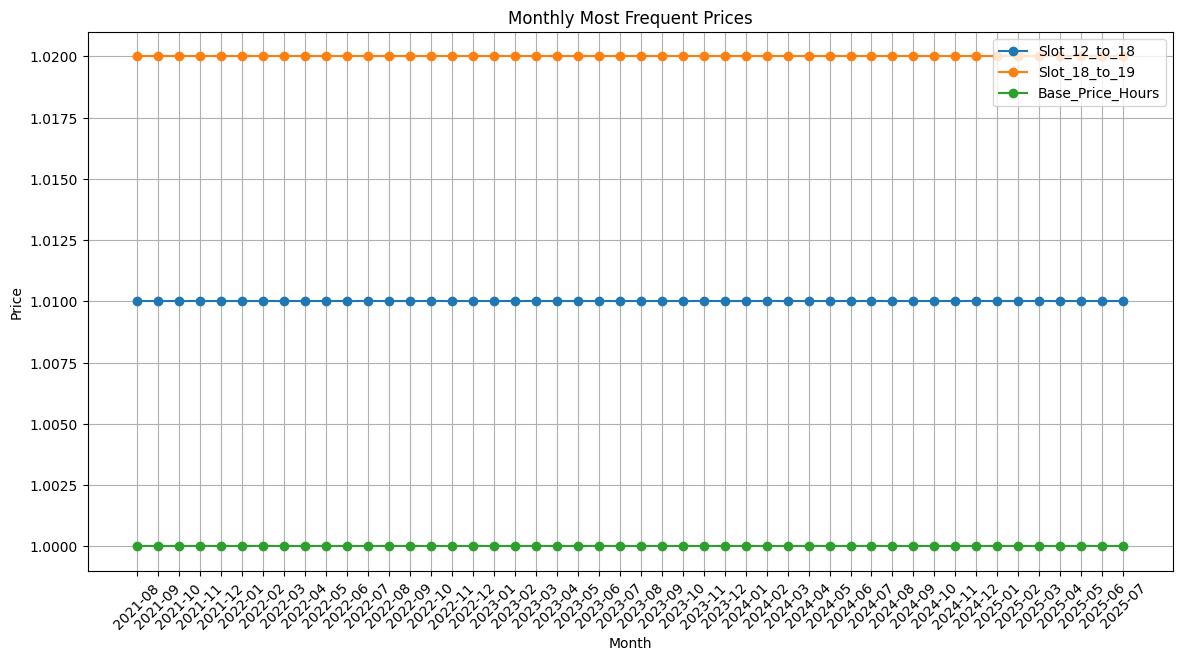

In [97]:
# plot the monthly_mode values
plt.figure(figsize=(14, 7))
plt.plot(monthly_mode['Month'].astype(str), monthly_mode['Slot_12_to_18']*1.01, label='Slot_12_to_18', marker='o')
plt.plot(monthly_mode['Month'].astype(str), monthly_mode['Slot_18_to_19']*1.02, label='Slot_18_to_19', marker='o')
plt.plot(monthly_mode['Month'].astype(str), monthly_mode['Base_Price_Hours'], label='Base_Price_Hours', marker='o')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly Most Frequent Prices')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [88]:
# now i want to merge this monthly_mode with daily_prices on Month column
daily_prices = pd.merge(daily_prices, monthly_mode, on='Month', suffixes=('', '_Monthly_Mode'))
daily_prices.head(10)

Time_Slot,Sale_Date,Base_Price_Hours,Outside_Sale_Hours,Slot_12_to_18,Slot_18_to_19,Month,Slot_12_to_18_Monthly_Mode,Slot_18_to_19_Monthly_Mode,Base_Price_Hours_Monthly_Mode
0,2021-08-19,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0
1,2021-08-23,1.0,NaN,1.0,0.0,2021-08,1.0,1.0,1.0
2,2021-08-24,NaN,NaN,1.0,0.0,2021-08,1.0,1.0,1.0
3,2021-08-25,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0
4,2021-08-26,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0
5,2021-08-27,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0
6,2021-08-29,1.0,NaN,0.0,1.0,2021-08,1.0,1.0,1.0
7,2021-08-30,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0
8,2021-08-31,1.0,NaN,1.0,1.0,2021-08,1.0,1.0,1.0
9,2021-09-01,1.0,NaN,1.0,1.0,2021-09,1.0,1.0,1.0


In [89]:
# before filling the NaN values (0 values) i want to add new columns for each columns to know if the price changed or not
# if the price equal to 0 then the price changed
daily_prices["Base_Price_Hours_Changed"] = daily_prices["Base_Price_Hours"].eq(0)
daily_prices["Slot_12_to_18_Changed"] = daily_prices["Slot_12_to_18"].eq(0)
daily_prices["Slot_18_to_19_Changed"] = daily_prices["Slot_18_to_19"].eq(0)
daily_prices.head(10)

Time_Slot,Sale_Date,Base_Price_Hours,Outside_Sale_Hours,Slot_12_to_18,Slot_18_to_19,Month,Slot_12_to_18_Monthly_Mode,Slot_18_to_19_Monthly_Mode,Base_Price_Hours_Monthly_Mode,Base_Price_Hours_Changed,Slot_12_to_18_Changed,Slot_18_to_19_Changed
0,2021-08-19,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0,False,True,True
1,2021-08-23,1.0,NaN,1.0,0.0,2021-08,1.0,1.0,1.0,False,False,True
2,2021-08-24,NaN,NaN,1.0,0.0,2021-08,1.0,1.0,1.0,False,False,True
3,2021-08-25,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0,False,True,True
4,2021-08-26,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0,False,True,True
5,2021-08-27,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0,False,True,True
6,2021-08-29,1.0,NaN,0.0,1.0,2021-08,1.0,1.0,1.0,False,True,False
7,2021-08-30,1.0,NaN,0.0,0.0,2021-08,1.0,1.0,1.0,False,True,True
8,2021-08-31,1.0,NaN,1.0,1.0,2021-08,1.0,1.0,1.0,False,False,False
9,2021-09-01,1.0,NaN,1.0,1.0,2021-09,1.0,1.0,1.0,False,False,False


In [90]:
# now from daily_prices i want to fill the NaN values with most frequent value of that month  for base price, slot_12_to_18 and slot_18_to_19
daily_prices['Slot_12_to_18'] = daily_prices.apply(
    lambda row: row['Slot_12_to_18_Monthly_Mode'] if row['Slot_12_to_18'] == 0 else row['Slot_12_to_18'], axis=1)
daily_prices['Slot_18_to_19'] = daily_prices.apply(
    lambda row: row['Slot_18_to_19_Monthly_Mode'] if row['Slot_18_to_19'] == 0 else row['Slot_18_to_19'], axis=1)
daily_prices['Base_Price_Hours'] = daily_prices.apply(
    lambda row: row['Base_Price_Hours_Monthly_Mode'] if row['Base_Price_Hours'] == 0 else row['Base_Price_Hours'], axis=1)
daily_prices = daily_prices.drop(columns=['Slot_12_to_18_Monthly_Mode', 'Slot_18_to_19_Monthly_Mode', 'Base_Price_Hours_Monthly_Mode', 'Month'])
daily_prices

Time_Slot,Sale_Date,Base_Price_Hours,Outside_Sale_Hours,Slot_12_to_18,Slot_18_to_19,Base_Price_Hours_Changed,Slot_12_to_18_Changed,Slot_18_to_19_Changed
0,2021-08-19,1.0,NaN,1.0,1.0,False,True,True
1,2021-08-23,1.0,NaN,1.0,1.0,False,False,True
2,2021-08-24,NaN,NaN,1.0,1.0,False,False,True
3,2021-08-25,1.0,NaN,1.0,1.0,False,True,True
4,2021-08-26,1.0,NaN,1.0,1.0,False,True,True
...,...,...,...,...,...,...,...,...
1424,2025-07-18,1.0,NaN,1.0,1.0,False,True,True
1425,2025-07-19,1.0,NaN,1.0,1.0,False,False,False
1426,2025-07-20,1.0,NaN,1.0,1.0,False,False,False
1427,2025-07-21,1.0,NaN,1.0,1.0,False,False,False


In [91]:
# i want the range of dates from min to max date , and fill the missing dates with forward fill method or back fill method
all_dates = pd.date_range(start=daily_prices['Sale_Date'].min(), end=daily_prices['Sale_Date'].max())
all_dates_df = pd.DataFrame(all_dates, columns=['Sale_Date'])
all_dates_df["Sale_Date"] = all_dates_df["Sale_Date"].dt.date
daily_prices = pd.merge(all_dates_df, daily_prices, on='Sale_Date', how='left')
daily_prices = daily_prices.sort_values('Sale_Date')
daily_prices.head(10)

,Sale_Date,Base_Price_Hours,Outside_Sale_Hours,Slot_12_to_18,Slot_18_to_19,Base_Price_Hours_Changed,Slot_12_to_18_Changed,Slot_18_to_19_Changed
0,2021-08-19,1.0,NaN,1.0,1.0,False,True,True
1,2021-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-23,1.0,NaN,1.0,1.0,False,False,True
5,2021-08-24,NaN,NaN,1.0,1.0,False,False,True
6,2021-08-25,1.0,NaN,1.0,1.0,False,True,True
7,2021-08-26,1.0,NaN,1.0,1.0,False,True,True
8,2021-08-27,1.0,NaN,1.0,1.0,False,True,True
9,2021-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# fill the NaN values with forward fill method or back fill method
daily_prices["Base_Price_Hours"] = daily_prices["Base_Price_Hours"].ffill().bfill()
daily_prices["Slot_12_to_18"] = daily_prices["Slot_12_to_18"].ffill().bfill()
daily_prices["Slot_18_to_19"] = daily_prices["Slot_18_to_19"].ffill().bfill()
# fill the NaN values in the "Base_Price_Hours_Changed" , "Slot_12_to_18_Changed" and "Slot_18_to_19_Changed" columns with True
# .fillna(True) fills the missing values
# .astype(bool) explicitly converts the column to the boolean type
daily_prices["Base_Price_Hours_Changed"] = daily_prices["Base_Price_Hours_Changed"].fillna(True).astype(bool)
daily_prices["Slot_12_to_18_Changed"] = daily_prices["Slot_12_to_18_Changed"].fillna(True).astype(bool)
daily_prices["Slot_18_to_19_Changed"] = daily_prices["Slot_18_to_19_Changed"].fillna(True).astype(bool)
daily_prices.head(10)

C:\Users\fadia\AppData\Local\Temp\ipykernel_2980\1294513242.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  daily_prices["Base_Price_Hours_Changed"] = daily_prices["Base_Price_Hours_Changed"].fillna(True).astype(bool)
C:\Users\fadia\AppData\Local\Temp\ipykernel_2980\1294513242.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  daily_prices["Slot_12_to_18_Changed"] = daily_prices["Slot_12_to_18_Changed"].fillna(True).astype(bool)
C:\Users\fadia\AppData\Local\Temp\ipykernel_2980\1294513242.py:10: FutureWarning: Downcasting object dtype arrays on .fill

,Sale_Date,Base_Price_Hours,Outside_Sale_Hours,Slot_12_to_18,Slot_18_to_19,Base_Price_Hours_Changed,Slot_12_to_18_Changed,Slot_18_to_19_Changed
0,2021-08-19,1.0,NaN,1.0,1.0,False,True,True
1,2021-08-20,1.0,NaN,1.0,1.0,True,True,True
2,2021-08-21,1.0,NaN,1.0,1.0,True,True,True
3,2021-08-22,1.0,NaN,1.0,1.0,True,True,True
4,2021-08-23,1.0,NaN,1.0,1.0,False,False,True
5,2021-08-24,1.0,NaN,1.0,1.0,False,False,True
6,2021-08-25,1.0,NaN,1.0,1.0,False,True,True
7,2021-08-26,1.0,NaN,1.0,1.0,False,True,True
8,2021-08-27,1.0,NaN,1.0,1.0,False,True,True
9,2021-08-28,1.0,NaN,1.0,1.0,True,True,True


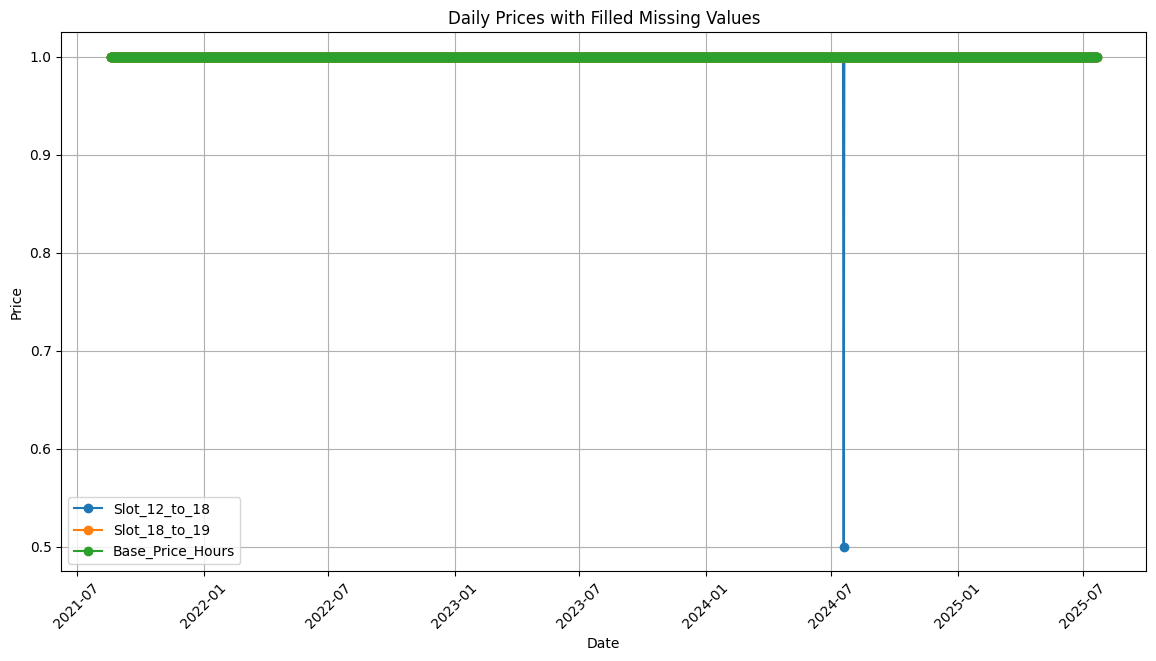

In [93]:
plt.figure(figsize=(14, 7))
plt.plot(daily_prices['Sale_Date'], daily_prices['Slot_12_to_18'], label='Slot_12_to_18', marker='o')
plt.plot(daily_prices['Sale_Date'], daily_prices['Slot_18_to_19'], label='Slot_18_to_19', marker='o')
plt.plot(daily_prices['Sale_Date'], daily_prices['Base_Price_Hours'], label='Base_Price_Hours', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Prices with Filled Missing Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

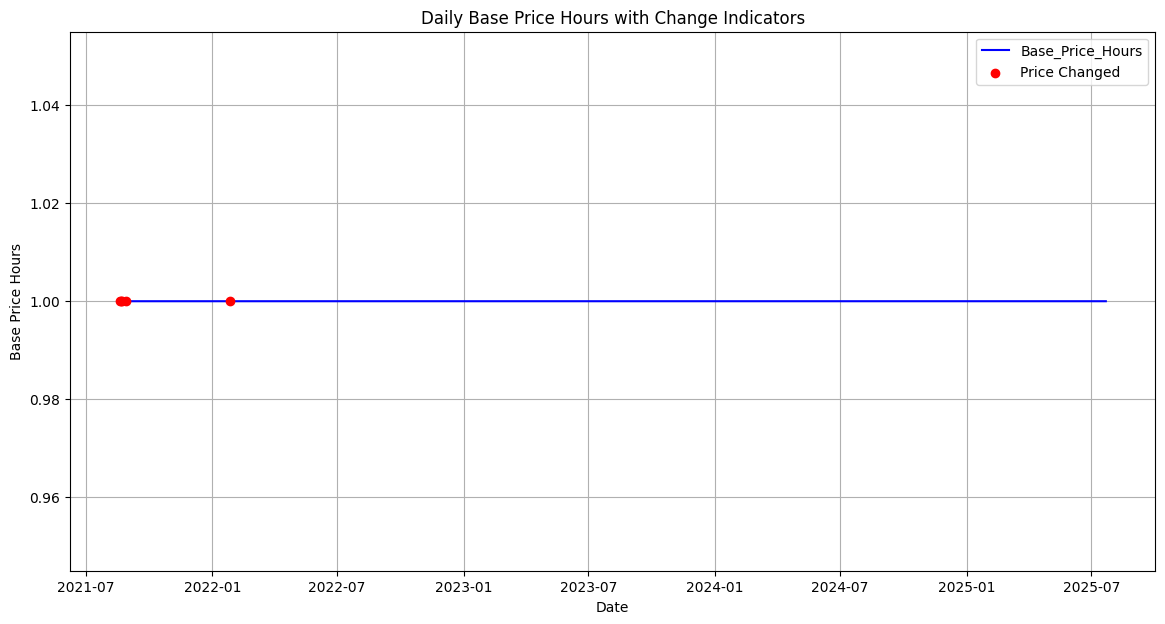

In [94]:
# plot the base price houre and base price houre changed
plt.figure(figsize=(14, 7))
plt.plot(daily_prices['Sale_Date'], daily_prices['Base_Price_Hours'], label='Base_Price_Hours', color='blue')
plt.scatter(daily_prices.loc[daily_prices['Base_Price_Hours_Changed'], 'Sale_Date'], daily_prices.loc[daily_prices['Base_Price_Hours_Changed'], 'Base_Price_Hours'], color='red', label='Price Changed', zorder=5)
plt.xlabel('Date')
plt.ylabel('Base Price Hours')
plt.title('Daily Base Price Hours with Change Indicators')
plt.legend()
plt.grid()
plt.show()


In [95]:
mask = (item_df["Price"]==3) & (item_df["Sale_Hour"]>18)
item_df[mask].head(60)

,Date,Price,Sale_Date,Sale_Hour,Time_Slot
